<a href="https://colab.research.google.com/github/nekroz-coder/Airlanes-Booking-Prediction/blob/main/airlanes_Booking_UAS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Muhammad Nur Maajid_1103228145

---


Mohammad Jody Hermawan_1103228241

---


Khairi Hibatullah Ridho_1103228240

Struktur Dataset
1. num_passengers = number of passengers travelling
2. sales_channel = sales channel booking was made on
3. trip_type = trip Type (Round Trip, One Way, Circle Trip)
4. purchase_lead = number of days between travel date and booking date
5. length_of_stay = number of days spent at destination
6. flight_hour = hour of flight departure
7. flight_day = day of week of flight departure
8. route = origin -> destination flight route
9. booking_origin = country from where booking was made
10. wants_extra_baggage = if the customer wanted extra baggage in the booking
11. wants_preferred_seat = if the customer wanted a preferred seat in the booking
12. wants_in_flight_meals = if the customer wanted in-flight meals in the booking
13. flight_duration = total duration of flight (in hours)
14. booking_complete = flag indicating if the customer completed the booking


#Exploring Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show
from bokeh.transform import dodge
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/Dataset/customer_booking.csv'
df = pd.read_csv(data_path, encoding='latin1')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/Dataset/customer_booking.csv'
df = pd.read_csv(data_path, encoding='latin1')

1. Exploring Data.

In [ ]:
df.head(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


In [ ]:
df.tail(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
49990,1,Internet,RoundTrip,12,6,10,Sat,PERPNH,Australia,0,0,0,5.62,0
49991,1,Internet,RoundTrip,8,6,6,Mon,PERPNH,Australia,0,1,0,5.62,0
49992,1,Internet,RoundTrip,14,6,12,Fri,PERPNH,Australia,1,0,0,5.62,0
49993,1,Internet,RoundTrip,19,6,12,Sun,PERPNH,Australia,1,0,0,5.62,0
49994,2,Internet,RoundTrip,25,6,9,Sun,PERPNH,Australia,0,0,0,5.62,0
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0
49999,1,Internet,RoundTrip,19,6,10,Thu,PERPNH,Australia,0,1,0,5.62,0


2. Checking the data types.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The Dataset contain mulitple objects, int64 and float64 data types.

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


3. Checking For Null Values in the dataset.

In [ ]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [ ]:
df.nunique()

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64

4. Checking the unique values in columns obtain object64 data types

In [ ]:
df['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [ ]:
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [ ]:
df['flight_day'].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
df['booking_origin'].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'R\x82union', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanma

5. Hence there is a spelling mistake in booking origin Replacing it with correct spellings.

In [ ]:
df['booking_origin'] = df['booking_origin'].replace('R\x82union','Reunion')

In [ ]:
df['booking_origin'].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Reunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

6. Checking data of specific Value in booking_origin column for '(not set)'

In [ ]:
target_value = '(not set)'
filtered_df = df[df['booking_origin'] ==target_value]
filtered_df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
252,2,Internet,RoundTrip,14,17,10,Sat,AKLKUL,(not set),1,0,0,8.83,1
1147,3,Internet,RoundTrip,40,17,0,Fri,AKLKUL,(not set),0,0,0,8.83,0
4547,1,Internet,RoundTrip,29,38,20,Wed,CKGTRZ,(not set),1,0,1,4.83,0
6311,2,Internet,RoundTrip,197,42,1,Thu,COKMEL,(not set),1,1,1,8.83,0
6518,2,Internet,RoundTrip,248,24,22,Fri,COKOOL,(not set),1,0,0,8.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45921,2,Internet,RoundTrip,60,6,11,Mon,HGHHKT,(not set),1,0,0,5.07,0
46007,1,Internet,RoundTrip,163,6,1,Mon,HGHSIN,(not set),0,0,0,5.07,0
46043,1,Internet,RoundTrip,5,6,14,Fri,HGHTRZ,(not set),1,1,0,5.07,1
46847,1,Internet,RoundTrip,46,6,16,Wed,HNDPEN,(not set),1,0,0,7.57,1


In [ ]:
df['flight_duration'].unique()

array([5.52, 5.07, 7.57, 6.62, 7.  , 4.75, 8.83, 7.42, 6.42, 5.33, 4.67,
       5.62, 8.58, 8.67, 4.72, 8.15, 6.33, 5.  , 4.83, 9.5 , 5.13])

In [ ]:
df['route'].unique()

array(['AKLDEL', 'AKLHGH', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
       'AKLKUL', 'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN',
       'AORKIX', 'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER',
       'BBISYD', 'BDOCTS', 'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA',
       'BDOKIX', 'BDOMEL', 'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS',
       'BDOPVG', 'BDOSYD', 'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS',
       'BKICTU', 'BKIHND', 'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL',
       'BKIMRU', 'BKIOOL', 'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG',
       'BKISYD', 'BKIXIY', 'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD',
       'BOMMEL', 'BOMOOL', 'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN',
       'BTUPER', 'BTUSYD', 'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH',
       'BWNIKA', 'BWNKTM', 'BWNMEL', 'BWNOOL', 'BWNPER', 'BWNSYD',
       'BWNTPE', 'CANDEL', 'CANIKA', 'CANMEL', 'CANMRU', 'CANOOL',
       'CANPER', 'CANSYD', 'CCUMEL', 'CCUMRU', 'CCUOOL', 'CCUPER',
       'CCUSYD', 'CCUTPE', 'CEBMEL', 'CEBOOL', 'CEBPER', 'CEBS

In [ ]:
df.select_dtypes(include=['object']).head(10)

,sales_channel,trip_type,flight_day,route,booking_origin
0,Internet,RoundTrip,Sat,AKLDEL,New Zealand
1,Internet,RoundTrip,Sat,AKLDEL,New Zealand
2,Internet,RoundTrip,Wed,AKLDEL,India
3,Internet,RoundTrip,Sat,AKLDEL,New Zealand
4,Internet,RoundTrip,Wed,AKLDEL,India
5,Internet,RoundTrip,Thu,AKLDEL,New Zealand
6,Internet,RoundTrip,Thu,AKLDEL,New Zealand
7,Internet,RoundTrip,Mon,AKLDEL,India
8,Internet,RoundTrip,Mon,AKLDEL,New Zealand
9,Mobile,RoundTrip,Sun,AKLDEL,India


In [ ]:
df2 = df.select_dtypes(include=['number']).head(10)
df2

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,262,19,7,1,0,0,5.52,0
1,1,112,20,3,0,0,0,5.52,0
2,2,243,22,17,1,1,0,5.52,0
3,1,96,31,4,0,0,1,5.52,0
4,2,68,22,15,1,0,1,5.52,0
5,1,3,48,20,1,0,1,5.52,0
6,3,201,33,6,1,0,1,5.52,0
7,2,238,19,14,1,0,1,5.52,0
8,1,80,22,4,0,0,1,5.52,0
9,1,378,30,12,0,0,0,5.52,0


In [ ]:
df.drop_duplicates()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


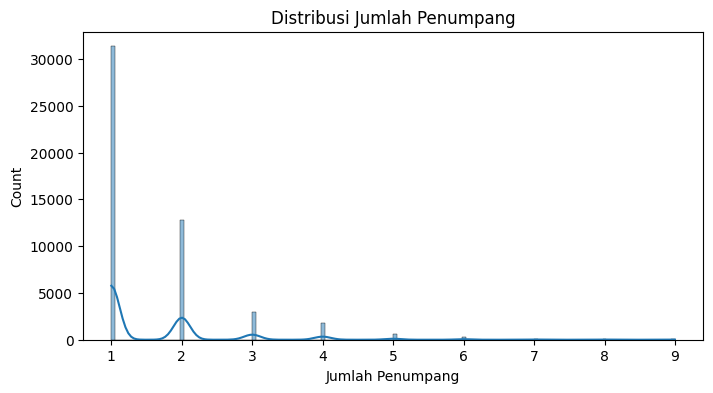

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['num_passengers'], kde=True)
plt.title('Distribusi Jumlah Penumpang')
plt.xlabel('Jumlah Penumpang')

plt.show()

7. Checking Co-relation of the variables.

In [ ]:
corr_matrix = df2.corr()
corr_matrix

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,0.283864,-0.201608,0.098305,0.738549,0.201008,0.123091,NaN,NaN
purchase_lead,0.283864,1.000000,-0.348299,0.002023,0.012035,0.229994,-0.606617,NaN,NaN
length_of_stay,-0.201608,-0.348299,1.000000,0.355698,0.080011,-0.176771,0.362402,NaN,NaN
flight_hour,0.098305,0.002023,0.355698,1.000000,0.623492,0.388959,0.063050,NaN,NaN
wants_extra_baggage,0.738549,0.012035,0.080011,0.623492,1.000000,0.272166,0.166667,NaN,NaN
wants_preferred_seat,0.201008,0.229994,-0.176771,0.388959,0.272166,1.000000,-0.408248,NaN,NaN
wants_in_flight_meals,0.123091,-0.606617,0.362402,0.063050,0.166667,-0.408248,1.000000,NaN,NaN
flight_duration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
booking_complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


gambaran tentang hubungan antara waktu pembelian (purchase_lead) dan jam penerbangan (flight_hour), serta bagaimana ini berbeda berdasarkan saluran penjualan (sales_channel).

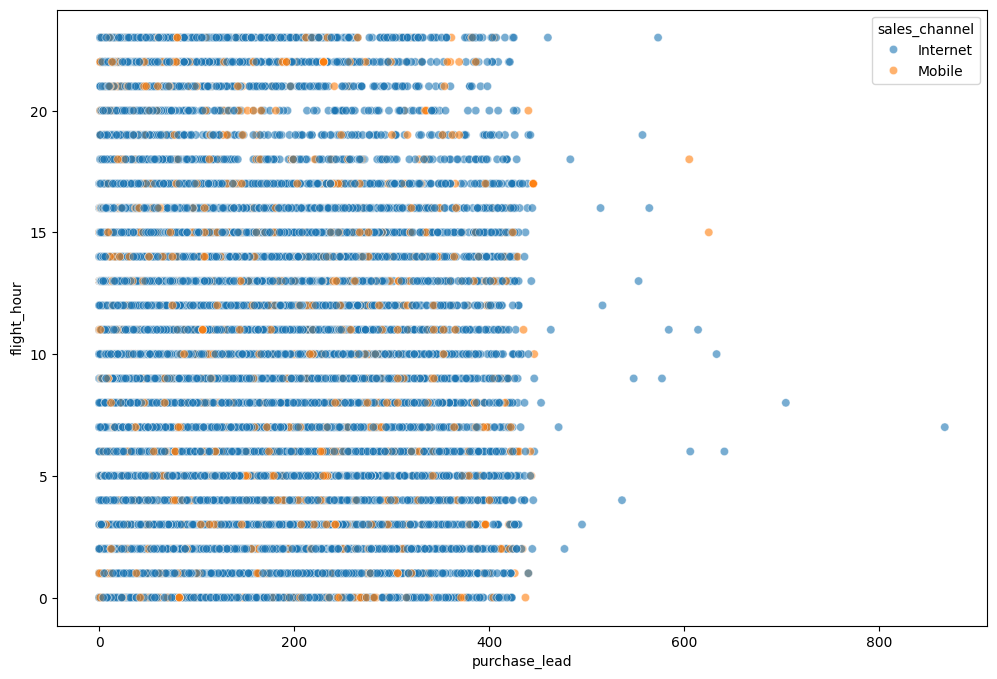

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='purchase_lead', y='flight_hour', hue='sales_channel', alpha=0.6)
plt.show()

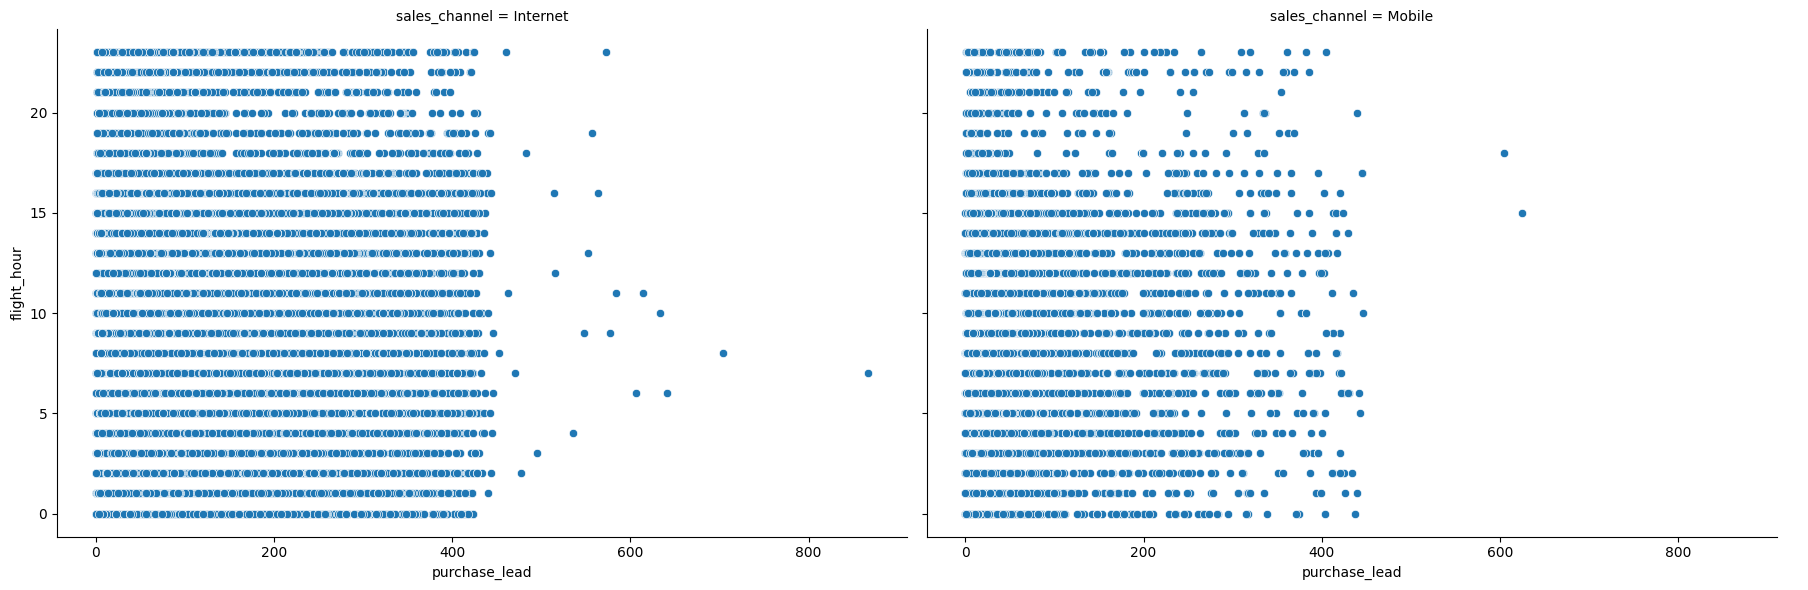

In [ ]:
# Mengatur ukuran figure
g = sns.FacetGrid(df, col='sales_channel', height=6, aspect=1.5)
g.map(sns.scatterplot, 'purchase_lead', 'flight_hour')
g.add_legend()

# Menampilkan plot
plt.show()


#wants extra baggage prediction

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
import lightgbm as lgb
import joblib

In [ ]:
# Drop kolom yang tidak relevan
df.drop(['booking_complete', 'flight_duration', 'route'], axis=1, inplace=True)

In [ ]:
# One-hot encoding untuk kolom kategorikal
encoder = OneHotEncoder(drop='first')
encoded_cols = encoder.fit_transform(df.select_dtypes(include='object'))
encoded_df = pd.DataFrame(encoded_cols.toarray(), columns=encoder.get_feature_names_out(df.select_dtypes(include='object').columns))
df = pd.concat([df.select_dtypes(exclude='object'), encoded_df], axis=1)


In [ ]:
# Memisahkan fitur (X) dan target (y)
X = df.drop('wants_extra_baggage', axis=1)
y = df['wants_extra_baggage']

In [ ]:
# Menghitung korelasi
correlations = df.corr()['wants_extra_baggage'].abs()

In [ ]:
# Memilih fitur berdasarkan korelasi
relevant_features = correlations[correlations > 0.1].index.tolist()

In [ ]:
# Menghapus target variable dari relevant_features
relevant_features.remove('wants_extra_baggage')

In [ ]:
# Filter X untuk hanya menyertakan fitur yang relevan
X_filtered = X[relevant_features]

In [ ]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

In [ ]:
# Mendefinisikan model
model = RandomForestClassifier(random_state=42)

In [ ]:
# Melatih dan melakukan validasi silang pada model
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Skor rata-rata cross-validation: {scores.mean()}")

Skor rata-rata cross-validation: 0.723625


In [ ]:
# Melatih ulang model terbaik pada seluruh data pelatihan
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Menyimpan model terbaik
joblib.dump(model, 'best_model_wants_extra_baggage.pkl')
print(f"Model terbaik (Random Forest) telah disimpan sebagai 'best_model_wants_extra_baggage.pkl' dan siap untuk diunduh.")

Model terbaik (Random Forest) telah disimpan sebagai 'best_model_wants_extra_baggage.pkl' dan siap untuk diunduh.


neural networks


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

# Mendefinisikan model Neural Network
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

# Kompilasi model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Melatih model
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluasi model pada data pengujian
y_pred = (nn_model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model Neural Network: {accuracy}')

# Menyimpan model
nn_model.save('nn_model_wants_extra_baggage.h5')

print("Model Neural Network telah disimpan sebagai 'nn_model_wants_extra_baggage.h5' dan siap untuk diunduh.")

Epoch 1/10
1125/1125 [==============================] - 6s 4ms/step - loss: 0.5763 - accuracy: 0.6986 - val_loss: 0.5565 - val_accuracy: 0.7278
Epoch 2/10
1125/1125 [==============================] - 5s 4ms/step - loss: 0.5559 - accuracy: 0.7193 - val_loss: 0.5422 - val_accuracy: 0.7293
Epoch 3/10
1125/1125 [==============================] - 3s 3ms/step - loss: 0.5533 - accuracy: 0.7230 - val_loss: 0.5428 - val_accuracy: 0.7287
Epoch 4/10
1125/1125 [==============================] - 4s 3ms/step - loss: 0.5507 - accuracy: 0.7235 - val_loss: 0.5454 - val_accuracy: 0.7300
Epoch 5/10
1125/1125 [==============================] - 4s 4ms/step - loss: 0.5489 - accuracy: 0.7253 - val_loss: 0.5424 - val_accuracy: 0.7280
Epoch 6/10
1125/1125 [==============================] - 5s 5ms/step - loss: 0.5479 - accuracy: 0.7246 - val_loss: 0.5399 - val_accuracy: 0.7280
Epoch 7/10
1125/1125 [==============================] - 4s 4ms/step - loss: 0.5487 - accuracy: 0.7244 - val_loss: 0.5383 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


logistic regression

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle


# Inisialisasi dan latih model Logistic Regression
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Evaluasi model pada data pengujian
y_pred = logreg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model Logistic Regression: {accuracy}')

# Convert model to dictionary
model_dict = logreg_model.__dict__

# Menyimpan model dictionary
pickle.dump(model_dict, open('logistic_regression_model_wants_extra_baggage.pkl', 'wb'))

print("Model Logistic Regression (dalam bentuk dictionary) telah disimpan sebagai 'logistic_regression_model_wants_extra_baggage.pkl' dan siap untuk diunduh.")


Akurasi model Logistic Regression: 0.7045
Model Logistic Regression (dalam bentuk dictionary) telah disimpan sebagai 'logistic_regression_model_wants_extra_baggage.pkl' dan siap untuk diunduh.


decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle

# Inisialisasi dan latih model Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Evaluasi model pada data pengujian
y_pred = tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model Decision Tree: {accuracy}')

# Convert model to dictionary
model_dict = tree_model.__dict__

# Menyimpan model dictionary
pickle.dump(model_dict, open('decision_tree_model_wants_extra_baggage.pkl', 'wb'))
print("Model Decision Tree (dalam bentuk dictionary) telah disimpan sebagai 'decision_tree_model_wants_extra_baggage.pkl' dan siap untuk diunduh.")


Akurasi model Decision Tree: 0.7102
Model Decision Tree (dalam bentuk dictionary) telah disimpan sebagai 'decision_tree_model_wants_extra_baggage.pkl' dan siap untuk diunduh.
